![Noteable.ac.uk Banner](https://github.com/jstix/mr-noteable/blob/master/Banner%20image/1500x500.jfif?raw=true)

# Noteable Data Visualization in Python

## Instructions

Hit the Cell button and then Run, to run a particular cell. In case you would like to see the output for the whole file, press Cell and then Run All. <b> Note: </b> Place the .png (or .jpg) image file in the same folder as the notebook, otherwise the code will not work.

## Goals

The goal of this notebook is for the student to become familiar with how images are used and analysed in Python. This notebook represents a fit visualization tool for students from all the Computer Science classes, from National 3 to Advanced Higher. Moreover, the notebook represents good practice for students to become more familiarised with multi-dimensional arrays.

## Explore

### Image import

Welcome to another coding session on Python, Jupyter Notebooks! This time we will explore the image analysis field. It has applications all over the science: robotics, image vision, chemistry, biology, physics, just to name a few of them... We will analyze some basic procedure, code lines, even algorithms, and get you a bit more familiarized with the image handling. The notebook is 100% interactive, in the way that you will visualize the images at each step and be able to modify the values whenever you want

Let us begin by importing the following standard libraries (they are the most basic and met in Python, we will have separate sessions dedicated to them):

In [28]:
import scipy
from scipy import ndimage
import numpy as np

For an intuition, ndimage stands for n-dimensional images... In mathematics and computing science (at a very advanced level), the images have many dimensions, apart from the x and y axis (dimensions given by the pixel intensity, for example). Of course, we will only consider the 2D case. Let us print the available image on the Jupyter Notebook:

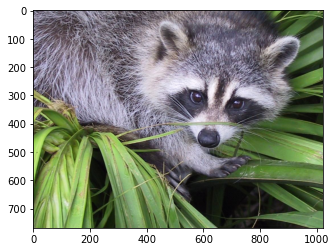

In [29]:
from scipy import misc
import imageio
f = misc.face()
imageio.imsave('raccoon.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

The following code line is for expressing the numbers behind the image. Print some of the features of the matrix: 

In [30]:
#face = imageio.imread('raccoon.png')
f.shape 

(768, 1024, 3)

From this mere operation and a quick look on the graph we can deduce the following: the image is made of (768 x 1024) pixels. Each of them is represented by three parameters - these stand for the RGB channel (red-green-blue). What does this mean? Each color can be decomposed into the three main colors red, green and blue. For instance, yellow is given by the mixture red-green. Red and blue together give purple, while all three colors together, in equal amounts, result in black. The amount of each color is taken, and after an average is done, the result is the pixel you see on the plot.

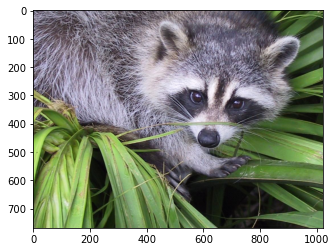

In [31]:
plt.imshow(f, cmap=plt.cm.gray, vmin=400, vmax=600)

### Image contrast

Let's see how the contrasts between the images can be sharpened... Below are some plots for the image

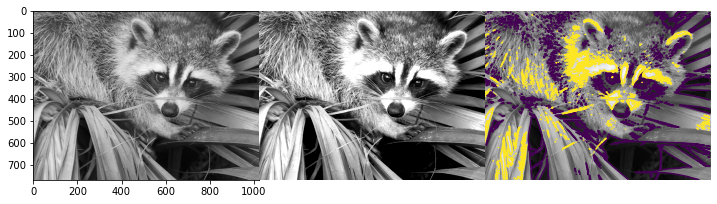

In [32]:
f = scipy.misc.face(gray=True)

plt.figure(figsize=(10, 3.6))

plt.subplot(131) # The plot on the left
plt.imshow(f, cmap=plt.cm.gray)

plt.subplot(132) # The plot on the center
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')

plt.subplot(133) # The plot on the right
plt.imshow(f, cmap=plt.cm.gray)
plt.contour(f, [50, 200])
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show()

We can stay a bit more on this, just so you will understand it better, because there are some parameters which may sound a bit unfamiliar...Firstly, there is a cmap function - thid one stands for the colormap, let's explore it. Print again the original image, see how it looks..

Now let us apply a colormap to this image, see how it looks afterwards..

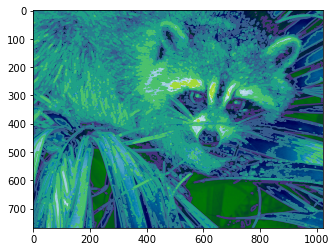

In [33]:
f = misc.face(gray=True)
imageio.imsave('raccoon.png', f) # uses the Image module (PIL)

plt.imshow(f, cmap = 'ocean')
plt.contour(f)
plt.show()

Looks different, doesn't it? Let's check all the values that colormap can take:

We will make use in the following exercise of the colormap parameter, and the other function of plotting. There were three subplots in the previous exercise, given by the numbers (131), (132), (133).

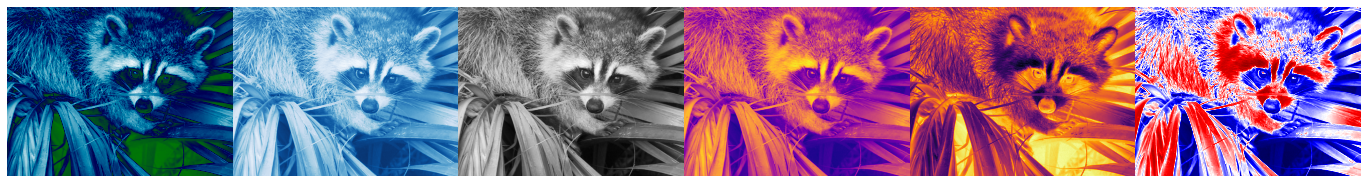

In [34]:
f = misc.face(gray=True)

plt.figure(figsize=(20, 10))

plt.subplot(161) # The plot on the left
plt.imshow(f, cmap='ocean')
plt.axis('off')

plt.subplot(162) # The plot on the center
plt.imshow(f, cmap='Blues_r')
plt.axis('off')

plt.subplot(163) # The plot on the right
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
#plt.contour(f, [50, 200])

plt.subplot(164)
plt.imshow(f, cmap='plasma')
plt.axis('off')

plt.subplot(165)
plt.imshow(f, cmap='inferno_r')
plt.axis('off')

plt.subplot(166)
plt.imshow(f, cmap='seismic')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show()

So much for playing with the colormaps, let us go towards another useful operation: face detection. In simpler terms, let's see the face of the raccoon.

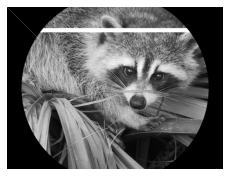

In [35]:
face = scipy.misc.face(gray=True)
face[10:13, 20:23]
face[100:120] = 255

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/4
face[mask] = 0
face[range(400), range(400)] = 255

plt.figure(figsize=(3, 3))
plt.axes([0, 0, 1, 1])
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

And below are more operations to do with the photo - zoom in for the face of the raccoon, flip the image, rotate the image upside down, and so on...

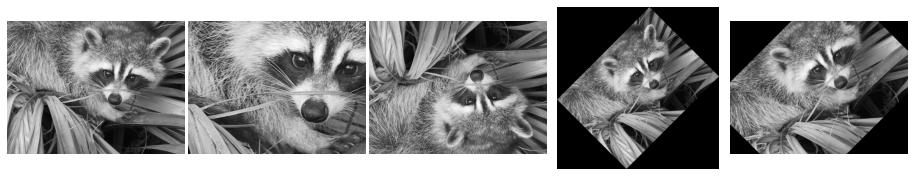

In [36]:
face = scipy.misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx//4:-lx//4, ly//4:-ly//4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

plt.figure(figsize=(12.5, 2.5))


plt.subplot(151)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(crop_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

Are you familiar with the effect of blurring? When the image is not as clear as before? This is, at its core, a complex mathematical operation. This is how a blurred image looks.

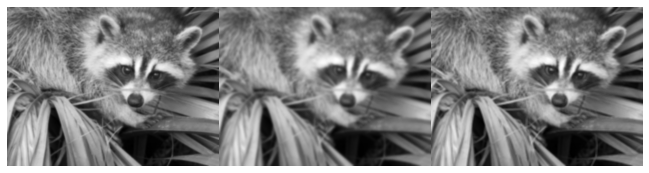

In [37]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)
local_mean = ndimage.uniform_filter(face, size=11)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(very_blurred, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(local_mean, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

plt.show()

![Noteable license](https://github.com/jstix/mr-noteable/blob/master/Banner%20image/Screenshot%202021-03-05%20115453.png?raw=true)